# Proyecto: Análisis de Bonos Comerciales en Profactura

## Introducción

**Profactura** es una empresa de factoring que opera en Chile, Perú y Colombia. En los últimos años, la empresa ha experimentado un crecimiento significativo. Sin embargo, enfrenta el desafío de la fuga de ejecutivos hacia nuevas empresas competidoras en el mercado.

Gonzalo, el Gerente Comercial de la empresa, propone dos alternativas de incentivos comerciales para retener a los empleados: la **Propuesta 1** y la **Propuesta 2**.

El objetivo principal del proyecto es simular los cálculos de bonos para los últimos dos años de los ejecutivos activos, comparando ambas propuestas y determinando cuál de ellas es más efectiva para retener a los ejecutivos.

## Objetivos del Proyecto

Los objetivos principales del proyecto son los siguientes:

- **Simular el cálculo de los bonos** mensuales para los ejecutivos activos durante los últimos 2 años.
- **Comparar los resultados** obtenidos para ambas propuestas (Propuesta 1 y Propuesta 2).
- **Recomendar a Gonzalo** cuál de las dos alternativas debería implementarse para evitar la fuga de ejecutivos hacia la competencia.

## Metodología

### Carga de Datos

Para realizar este análisis, se utilizaron los datos proporcionados en el archivo **Base_control_2.xlsx**, que contiene información detallada sobre las operaciones realizadas por los ejecutivos. La información relevante que se extrajo de este archivo incluye:

- **Monto de factura colocada**: El monto de las facturas que cada ejecutivo ha colocado.
- **Cantidad de clientes operando**: La cantidad de clientes con los cuales cada ejecutivo realiza operaciones mensualmente.
- **Ingreso generado por cada factura**: El ingreso que genera cada ejecutivo por las operaciones realizadas.
- **Otros detalles**: Información adicional sobre intereses y pagos que afectan los bonos.

Una vez cargados los datos, se procedió a procesarlos para calcular los bonos según los parámetros establecidos por cada una de las propuestas.

In [148]:
pip install pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [149]:
import pandas as pd # importamos libreria pandas

In [150]:
ventas=pd.read_excel('Base_control_2.xlsx', sheet_name="detalle") #importamos archivo

## Análisis de los Datos de Bonos Comerciales

El primer paso en el análisis es cargar los datos proporcionados en el archivo **`Base_control_2.xlsx`**, el cual contiene información detallada sobre las operaciones de los ejecutivos en **Profactura**. Este archivo fue cargado en Python utilizando la librería **pandas**, y los datos se extrajeron desde la hoja denominada **"detalle"**.

### Código Utilizado

Para cargar los datos desde el archivo Excel, se utilizó el siguiente código:

In [151]:
print(ventas.head()) #visualizamos columnas

   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por operación      IVA  \
0                Cliente 934      Ejecutivo 5                  30055   5710.0   
1                Cliente 934      Ejecutivo 5                   8782   1669.0   
2                Cliente 934      Ejecutivo 5                  38556   7326.0   
3                Cliente 934      Ejecutivo 5                  22550   4284.0   
4                Cliente 934      Ejecutivo 5                  84895  16130.0   

   Dias operación  Taa de interés a cliente  Interes  \
0            41.0                      1.15  28802.0   
1            41.0                      1.15   

## Análisis de Datos: Limpieza y Verificación de Nulos

En este paso, se realizó la limpieza de los datos y se verificaron los valores nulos presentes en el archivo de datos cargado. Para ello, se utilizaron dos métodos importantes de la librería **pandas**:

### Eliminación de Duplicados

Para eliminar las filas duplicadas en el conjunto de datos, se utilizó el siguiente código:

In [152]:
ventas.drop_duplicates(inplace=True) #eliminamos datos duplicados 

In [153]:
ventas.isnull().sum() #visualizar datos null en columnas 


ID_operacion                      0
Fecha creacion operación          2
Monto factura                     3
Nombre empresa solicitante        0
Nombre Ejecutivo                  2
Ingreso por operación             0
IVA                            3128
Dias operación                    2
Taa de interés a cliente          2
Interes                          14
Tasa interes inversionista        2
Unnamed: 11                   52857
Scoring riesgo                    2
Estado pago factura               0
Monto Abono                    4183
dtype: int64

In [154]:
ventas.shape #visualizamos cantidad de filas y columnas

(52857, 15)

In [155]:
ventas.drop(columns=['Unnamed: 11'], inplace=True) #eliminamos columna sin datos

In [156]:
ventas.shape #visualizamos si se elimino la columna

(52857, 14)

In [157]:
ventas.columns #visualizamos columnas para comenzar a filtrar

Index(['ID_operacion', 'Fecha creacion operación', 'Monto factura',
       'Nombre empresa solicitante', 'Nombre Ejecutivo',
       'Ingreso por operación', 'IVA', 'Dias operación',
       'Taa de interés a cliente', 'Interes', 'Tasa interes inversionista',
       'Scoring riesgo', 'Estado pago factura', 'Monto Abono'],
      dtype='object')

In [158]:
#eliminamos columnas que no utilizaremos para el analisis 
ventas.drop(columns=['IVA', 'Dias operación',
       'Taa de interés a cliente', 'Interes', 'Tasa interes inversionista',
       'Scoring riesgo', 'Estado pago factura', 'Monto Abono'], inplace=True, errors='ignore')

In [159]:
#verificamos columnas existentes
ventas.columns

Index(['ID_operacion', 'Fecha creacion operación', 'Monto factura',
       'Nombre empresa solicitante', 'Nombre Ejecutivo',
       'Ingreso por operación'],
      dtype='object')

## Presentación de la Propuesta: Carga, Filtrado y Preparación de los Datos

### Objetivo

El objetivo de estos bloques de código es limpiar y preparar los datos antes de realizar el análisis de los bonos comerciales. Los datos han sido cargados y ahora se procesan para filtrar las operaciones dentro de un rango de fechas determinado y crear las nuevas columnas necesarias para calcular los bonos de acuerdo con las dos propuestas.

### **1. Conversión de Fechas y Limpieza de Columnas**

In [160]:
# Asegúrate de convertir la columna de fechas al formato datetime
ventas['Fecha creacion operación'] = pd.to_datetime(ventas['Fecha creacion operación'], errors='coerce')

In [161]:
# Filtrar las fechas en el rango deseado
ventas = ventas[(ventas['Fecha creacion operación'] >= '2023-01-01') & 
                (ventas['Fecha creacion operación'] <= '2024-12-31')]

In [162]:
# Reiniciar el índice para evitar problemas posteriores
ventas.reset_index(drop=True, inplace=True)

In [163]:
# Verificar los resultados
print(ventas.head())
print(f"Datos restantes después del filtro: {ventas.shape}")

   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por operación  
0                Cliente 934      Ejecutivo 5                  30055  
1                Cliente 934      Ejecutivo 5                   8782  
2                Cliente 934      Ejecutivo 5                  38556  
3                Cliente 934      Ejecutivo 5                  22550  
4                Cliente 934      Ejecutivo 5                  84895  
Datos restantes después del filtro: (33368, 6)


## Explicación del Proceso para la Propuesta 1

### **1. Crear Columnas Vacías para Propuesta 1**
Se crean columnas vacías en el DataFrame para la clasificación por valor y el bono a pagar de la Propuesta 1, asignándoles valores iniciales de 0.

### **2. Verificación de las Nuevas Columnas**
Se verifica que las columnas recién creadas estén presentes en el DataFrame para asegurar que la estructura esté correcta.

### **3. Clasificación del Valor del Proyecto**
El monto de la factura se clasifica en tres categorías (Bajo, Medio, Alto valor) con porcentajes de bono del 0.25%, 0.50% y 0.60% respectivamente.

### **4. Cálculo del Bono a Pagar**
El bono a pagar se calcula multiplicando el monto de la factura por el porcentaje correspondiente a su clasificación y se guarda en una nueva columna.

### **5. Visualización de Resultados**
Se imprime una muestra de los primeros registros del DataFrame para verificar que los cálculos y las clasificaciones se hayan realizado correctamente.

In [164]:
# Crear columnas vacías para Propuesta 1
ventas['Clasificación por valor(proyecto1)'] = ""
ventas['% bono respecto al valor de la factura(proyecto1)'] = 0.0
ventas['bono_a_pagar(proyecto1)'] = 0.0


In [165]:
#verificamos que se agreguen las columnas nuevas
ventas.columns

Index(['ID_operacion', 'Fecha creacion operación', 'Monto factura',
       'Nombre empresa solicitante', 'Nombre Ejecutivo',
       'Ingreso por operación', 'Clasificación por valor(proyecto1)',
       '% bono respecto al valor de la factura(proyecto1)',
       'bono_a_pagar(proyecto1)'],
      dtype='object')

In [166]:
 # Clasifica el valor del proyecto basado en el monto de la factura.
def clasificar_valor_proyecto1(monto):
# Devuelve una categoría (Bajo, Medio, Alto) y un porcentaje de bonificación.
    if monto < 50000000:
        return "Bajo valor", 0.0025
    elif 50000000 <= monto <= 200000000:
        return "Medio valor", 0.005
    else:
        return "Alto valor", 0.006
        
#Desempaqueta los resultados (clasificación y porcentaje de bonificación) en dos nuevas columnas.
ventas['Clasificación por valor(proyecto1)'], ventas['% bono respecto al valor de la factura(proyecto1)'] = zip(
    *ventas['Monto factura'].apply(clasificar_valor_proyecto1)
)

In [167]:
#visualizamos columnas nuevas con  valores agregadoe
print(ventas.head()) 

   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por operación  \
0                Cliente 934      Ejecutivo 5                  30055   
1                Cliente 934      Ejecutivo 5                   8782   
2                Cliente 934      Ejecutivo 5                  38556   
3                Cliente 934      Ejecutivo 5                  22550   
4                Cliente 934      Ejecutivo 5                  84895   

  Clasificación por valor(proyecto1)  \
0                         Bajo valor   
1                         Bajo valor   
2                         Bajo valor   
3                         Bajo valor   
4           

In [168]:
#Calcula el bono a pagar multiplicando el monto de la factura por el porcentaje correspondiente
ventas['bono_a_pagar(proyecto1)'] = ventas['Monto factura'] * ventas['% bono respecto al valor de la factura(proyecto1)']

In [169]:
#Filtra las columnas relevantes para el proyecto 1 y las almacena en el DataFrame
propuesta_1 = ventas[['ID_operacion', 'Fecha creacion operación', 'Nombre Ejecutivo',
                       'Clasificación por valor(proyecto1)', '% bono respecto al valor de la factura(proyecto1)',
                       'bono_a_pagar(proyecto1)']]


In [170]:
#Muestra los primeros registros de los DataFrames ventas
print(ventas.head())

   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por operación  \
0                Cliente 934      Ejecutivo 5                  30055   
1                Cliente 934      Ejecutivo 5                   8782   
2                Cliente 934      Ejecutivo 5                  38556   
3                Cliente 934      Ejecutivo 5                  22550   
4                Cliente 934      Ejecutivo 5                  84895   

  Clasificación por valor(proyecto1)  \
0                         Bajo valor   
1                         Bajo valor   
2                         Bajo valor   
3                         Bajo valor   
4           

In [171]:
#Muestra los primeros registros de los DataFrames propuesta_1
print(propuesta_1.head())

   ID_operacion Fecha creacion operación Nombre Ejecutivo  \
0         68101               2024-12-31      Ejecutivo 5   
1         68100               2024-12-31      Ejecutivo 5   
2         68099               2024-12-31      Ejecutivo 5   
3         68098               2024-12-31      Ejecutivo 5   
4         68097               2024-12-31      Ejecutivo 5   

  Clasificación por valor(proyecto1)  \
0                         Bajo valor   
1                         Bajo valor   
2                         Bajo valor   
3                         Bajo valor   
4                         Bajo valor   

   % bono respecto al valor de la factura(proyecto1)  bono_a_pagar(proyecto1)  
0                                             0.0025                  4581.50  
1                                             0.0025                  1338.75  
2                                             0.0025                  6693.75  
3                                             0.0025                  38

## Explicación del Proceso para la Propuesta 2

### **1. Visualización de Primeros Registros para Propuesta 1**
Se muestra una pequeña muestra de los primeros registros de los datos de la Propuesta 1, incluyendo información de la clasificación y el bono a pagar calculado.

### **2. Crear Columnas Vacías para Propuesta 2**
Al igual que en la Propuesta 1, se crean columnas vacías para la clasificación por valor y el bono a pagar de la Propuesta 2, con valores iniciales establecidos en 0.

### **3. Clasificación del Valor del Proyecto Según Ingreso**
En esta etapa, se clasifica el valor del proyecto en tres categorías (Bajo, Medio, Alto) dependiendo del ingreso generado por el ejecutivo, con un porcentaje de bono que varía entre 5% y 10%.

### **4. Cálculo del Bono a Pagar para Propuesta 2**
El bono a pagar para la Propuesta 2 se calcula multiplicando el ingreso generado por el porcentaje correspondiente, el cual depende de la clasificación del valor del proyecto.

### **5. Filtrado de Columnas Relevantes para Propuesta 2**
Se filtran las columnas necesarias para la Propuesta 2, las cuales incluyen el ID de operación, la fecha de creación de la operación, el nombre del ejecutivo, la clasificación del valor del proyecto y el bono a pagar calculado.

In [172]:
# Crear columnas vacías para Propuesta 2
ventas['Clasificación por valor(proyecto2)'] = ""
ventas['% bono respecto al ingreso de la factura(proyecto2)'] = 0.0
ventas['bono_a_pagar(proyecto2)'] = 0.0

In [173]:
# Clasifica el valor del proyecto basado en el ingreso por operación.
def clasificar_valor_proyecto2(ingreso):
# Devuelve una categoría (Bajo, Medio, Alto) y un porcentaje de bonificación. 
    if ingreso < 100000:
        return "Bajo valor", 0.05
    elif 100000 <= ingreso <= 1000000:
        return "Medio valor", 0.0875
    else:
        return "Alto valor", 0.1
#Desempaqueta los resultados (clasificación y porcentaje de bonificación) en dos nuevas columnas.
ventas['Clasificación por valor(proyecto2)'], ventas['% bono respecto al ingreso de la factura(proyecto2)'] = zip(
    *ventas['Ingreso por operación'].apply(clasificar_valor_proyecto2)
)

In [174]:
#Calcula el bono a pagar multiplicando el ingreso por operación por el porcentaje correspondiente.
ventas['bono_a_pagar(proyecto2)'] = ventas['Ingreso por operación'] * ventas['% bono respecto al ingreso de la factura(proyecto2)']


In [175]:
#Filtra las columnas relevantes para el proyecto 2 y las almacena en el DataFrame
propuesta_2 = ventas[['ID_operacion', 'Fecha creacion operación', 'Nombre Ejecutivo',
                       'Clasificación por valor(proyecto2)', '% bono respecto al ingreso de la factura(proyecto2)',
                       'bono_a_pagar(proyecto2)']]


In [176]:
#Muestra los primeros registros del DataFrame propuesta_2
print(propuesta_2.head())

   ID_operacion Fecha creacion operación Nombre Ejecutivo  \
0         68101               2024-12-31      Ejecutivo 5   
1         68100               2024-12-31      Ejecutivo 5   
2         68099               2024-12-31      Ejecutivo 5   
3         68098               2024-12-31      Ejecutivo 5   
4         68097               2024-12-31      Ejecutivo 5   

  Clasificación por valor(proyecto2)  \
0                         Bajo valor   
1                         Bajo valor   
2                         Bajo valor   
3                         Bajo valor   
4                         Bajo valor   

   % bono respecto al ingreso de la factura(proyecto2)  \
0                                               0.05     
1                                               0.05     
2                                               0.05     
3                                               0.05     
4                                               0.05     

   bono_a_pagar(proyecto2)  
0             

## Resumen del Cálculo de Bonos y la Visualización de Resultados

### **4. Visualización de los Resultados**
Al realizar el cálculo del bono a pagar para **Propuesta 1** y **Propuesta 2**, se obtiene un DataFrame que incluye la siguiente información por cada operación:

- **Monto de Factura**
- **Clasificación de cada operación (Bajo, Medio, Alto valor)** tanto para el proyecto 1 como para el proyecto 2.
- **Porcentaje de bono respectivo** para cada propuesta según la clasificación.
- **Monto del bono a pagar** para cada propuesta, que se calcula multiplicando el monto de la factura o ingreso por el porcentaje correspondiente.

En el ejemplo proporcionado, se observa cómo se calculan los **bonos a pagar** para ambas propuestas, mostrando el **bono de Proyecto 1** y **bono de Proyecto 2** para diferentes operaciones.

### **5. Verificación y Cálculo Final**
Este proceso garantiza que todos los cálculos se realicen de manera correcta y asegura que el DataFrame esté correctamente estructurado para su análisis posterior.

El cálculo final se muestra en el DataFrame, confirmando los **bonos a pagar** de cada propuesta para todos los ejecutivos involucrados en las operaciones.

In [177]:
 # Clasifica el tráfico en Bajo, Medio o Alto basado en la cantidad de clientes.
def clasificar_trafico(cantidad):
 # Devuelve la clasificación y el bono fijo asociado.   
    if cantidad < 8:
        return "Bajo tráfico", 50000
    elif 8 <= cantidad <= 12:
        return "Medio tráfico", 120000
    else:
        return "Alto tráfico", 250000


In [178]:
# Crear el DataFrame clientes_operando (asegurándote de que esté definido)
clientes_operando = ventas.groupby('Nombre Ejecutivo')['Nombre empresa solicitante'].nunique().reset_index()
clientes_operando.columns = ['Nombre Ejecutivo', 'Cantidad de clientes operando']

# Aplicar la función de clasificación al DataFrame 'clientes_operando'
clientes_operando['Clasificación'] = clientes_operando['Cantidad de clientes operando'].apply(lambda x: clasificar_trafico(x)[0])
clientes_operando['Bono fijo bruto'] = clientes_operando['Cantidad de clientes operando'].apply(lambda x: clasificar_trafico(x)[1])

# Verificar el DataFrame resultante
print(clientes_operando)


    Nombre Ejecutivo  Cantidad de clientes operando  Clasificación  \
0        Ejecutivo 1                             51   Alto tráfico   
1       Ejecutivo 10                             20   Alto tráfico   
2       Ejecutivo 11                             15   Alto tráfico   
3       Ejecutivo 12                             19   Alto tráfico   
4       Ejecutivo 13                             53   Alto tráfico   
5       Ejecutivo 14                             33   Alto tráfico   
6       Ejecutivo 15                             20   Alto tráfico   
7       Ejecutivo 16                             10  Medio tráfico   
8       Ejecutivo 17                             13   Alto tráfico   
9       Ejecutivo 18                             26   Alto tráfico   
10      Ejecutivo 19                             12  Medio tráfico   
11       Ejecutivo 2                             81   Alto tráfico   
12      Ejecutivo 20                             15   Alto tráfico   
13      Ejecutivo 21

In [179]:
print(ventas.head())

   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por operación  \
0                Cliente 934      Ejecutivo 5                  30055   
1                Cliente 934      Ejecutivo 5                   8782   
2                Cliente 934      Ejecutivo 5                  38556   
3                Cliente 934      Ejecutivo 5                  22550   
4                Cliente 934      Ejecutivo 5                  84895   

  Clasificación por valor(proyecto1)  \
0                         Bajo valor   
1                         Bajo valor   
2                         Bajo valor   
3                         Bajo valor   
4           

### Paso 1: Crear columnas vacías para la Propuesta 1

El primer paso en el procesamiento de datos para la Propuesta 1 es crear nuevas columnas vacías dentro del DataFrame que servirán para almacenar los valores calculados más adelante. Las columnas creadas son:

- **'Clasificación por valor(proyecto1)'**: Esta columna almacenará la clasificación de cada proyecto basado en el valor de la factura, como "Bajo valor", "Medio valor" o "Alto valor".
- **'% bono respecto al valor de la factura(proyecto1)'**: Aquí se almacenará el porcentaje que se aplicará para calcular el bono basado en la clasificación del valor de la factura.
- **'bono_a_pagar(proyecto1)'**: En esta columna se guardará el valor final del bono a pagar según la Propuesta 1.

### Paso 2: Clasificar el valor del proyecto basado en el monto de la factura

Luego, se define una función **`clasificar_valor_proyecto1`** que tiene como objetivo clasificar el valor de cada proyecto según el monto de la factura. Los proyectos se dividen en tres categorías:

- **Bajo valor**: Si el monto de la factura es menor a 5,000,000, se asigna un porcentaje de 0.25%.
- **Medio valor**: Si el monto de la factura está entre 5,000,000 y 20,000,000, se asigna un porcentaje de 0.50%.
- **Alto valor**: Si el monto de la factura supera los 20,000,000, se asigna un porcentaje de 0.60%.

Esta clasificación se aplica a la columna **'Monto factura'**, y el resultado se guarda en las nuevas columnas **'Clasificación por valor(proyecto1)'** y **'% bono respecto al valor de la factura(proyecto1)'**.

### Paso 3: Calcular el bono a pagar para Propuesta 1

Con la clasificación del valor de la factura y el porcentaje correspondiente, ahora se calcula el bono a pagar. El bono se calcula multiplicando el monto de la factura por el porcentaje asignado según la clasificación (Bajo, Medio o Alto valor). El resultado se guarda en la columna **'bono_a_pagar(proyecto1)'**.

### Paso 4: Filtrar las columnas relevantes para la Propuesta 1

Una vez calculados los bonos, se filtran las columnas relevantes para la Propuesta 1 y se mantienen solo las que serán utilizadas en el análisis. Estas columnas son:

- **'ID_operacion'**
- **'Fecha creacion operación'**
- **'Monto factura'**
- **'Nombre Ejecutivo'**
- **'Clasificación por valor(proyecto1)'**
- **'% bono respecto al valor de la factura(proyecto1)'**
- **'bono_a_pagar(proyecto1)'**

Este paso asegura que el DataFrame contiene solo la información necesaria para la comparación de las propuestas.

### Resumen

En resumen, los primeros pasos del procesamiento de datos para la Propuesta 1 incluyen la creación de nuevas columnas vacías para almacenar los resultados de las clasificaciones y el cálculo de los bonos. Posteriormente, se clasifica cada proyecto en función del valor de la factura y se calcula el bono correspondiente. Por último, se filtran las columnas relevantes para mantener solo los datos necesarios para el análisis.

Este procedimiento prepara los datos para la visualización y comparación con la Propuesta 2.

In [180]:
# Crear una columna 'Mes/Año' en el DataFrame para agrupar por mes
ventas['Mes/Año'] = ventas['Fecha creacion operación'].dt.to_period('M')

# Visualizar los primeros registros de la nueva columna 'Mes/Año'
print("Primeros registros después de agregar la columna 'Mes/Año':")
print(ventas[['Fecha creacion operación', 'Mes/Año']].head())


Primeros registros después de agregar la columna 'Mes/Año':
  Fecha creacion operación  Mes/Año
0               2024-12-31  2024-12
1               2024-12-31  2024-12
2               2024-12-31  2024-12
3               2024-12-31  2024-12
4               2024-12-31  2024-12


In [181]:
# Verificar si la columna 'Cantidad de clientes operando' está en el DataFrame ventas
if 'Cantidad de clientes operando' not in ventas.columns:
    print("'Cantidad de clientes operando' no está en el DataFrame 'ventas'. Realizando el merge...")

    # Realizar el merge con el DataFrame 'clientes_operando'
    ventas = ventas.merge(
        clientes_operando[['Nombre Ejecutivo', 'Cantidad de clientes operando']],
        on='Nombre Ejecutivo',
        how='left',
        suffixes=('', '_duplicado')  # Sufijo para identificar duplicados
    )


'Cantidad de clientes operando' no está en el DataFrame 'ventas'. Realizando el merge...


In [182]:
# Eliminar columnas duplicadas (si existen)
if 'Cantidad de clientes operando_duplicado' in ventas.columns:
    print("Se detectó la columna 'Cantidad de clientes operando_duplicado'. Combinando valores...")

    # Combinar valores de las columnas originales y duplicadas
    ventas['Cantidad de clientes operando'] = ventas['Cantidad de clientes operando'].fillna(
        ventas['Cantidad de clientes operando_duplicado']
    )

    # Eliminar la columna duplicada
    ventas.drop(columns=['Cantidad de clientes operando_duplicado'], inplace=True)



In [183]:
# Eliminar columnas innecesarias con sufijos _x e _y si aparecen
if 'Cantidad de clientes operando_x' in ventas.columns and 'Cantidad de clientes operando_y' in ventas.columns:
    print("Se detectaron columnas con sufijos '_x' y '_y'. Combinando valores...")

    # Combinar valores de las columnas
    ventas['Cantidad de clientes operando'] = ventas['Cantidad de clientes operando_x'].combine_first(
        ventas['Cantidad de clientes operando_y']
    )

    # Eliminar columnas con sufijos
    ventas.drop(columns=['Cantidad de clientes operando_x', 'Cantidad de clientes operando_y'], inplace=True)



In [184]:
# Confirmar que solo queda una columna final y que está limpia
if 'Cantidad de clientes operando' not in ventas.columns:
    raise KeyError("La columna 'Cantidad de clientes operando' no se encuentra en el DataFrame ventas.")

# Imprimir columnas actuales para confirmar limpieza
print("Columnas actuales en ventas después de limpieza:", ventas.columns)

# Visualizar los primeros registros del DataFrame actualizado
print("Primeros registros del DataFrame actualizado:")
print(ventas.head())


Columnas actuales en ventas después de limpieza: Index(['ID_operacion', 'Fecha creacion operación', 'Monto factura',
       'Nombre empresa solicitante', 'Nombre Ejecutivo',
       'Ingreso por operación', 'Clasificación por valor(proyecto1)',
       '% bono respecto al valor de la factura(proyecto1)',
       'bono_a_pagar(proyecto1)', 'Clasificación por valor(proyecto2)',
       '% bono respecto al ingreso de la factura(proyecto2)',
       'bono_a_pagar(proyecto2)', 'Mes/Año', 'Cantidad de clientes operando'],
      dtype='object')
Primeros registros del DataFrame actualizado:
   ID_operacion Fecha creacion operación  Monto factura  \
0         68101               2024-12-31      1832600.0   
1         68100               2024-12-31       535500.0   
2         68099               2024-12-31      2677500.0   
3         68098               2024-12-31      1523676.0   
4         68097               2024-12-31      5176500.0   

  Nombre empresa solicitante Nombre Ejecutivo  Ingreso por o

## Resumen del Proceso de Cálculo de Bonos

### 1. Agrupación de los datos por ejecutivo y mes/año
Los datos de ventas se agrupan por **Nombre Ejecutivo** y **Mes/Año** para obtener las sumas de:
- **Monto de la factura**.
- **Ingreso por operación**.
- **Cantidad de clientes operando**.
Este paso organiza los datos de manera mensual por ejecutivo.

### 2. Repetición de la agrupación para validar los datos
Se vuelve a agrupar por ejecutivo y mes/año para asegurar que las sumas sean consistentes y válidas antes de los cálculos de bonos.

### 3. Verificación de consistencia de los datos
Un tercer agrupamiento valida la limpieza de los datos, garantizando que no existan errores antes de continuar con los cálculos.

### 4. Cálculo del Bono Propuesta 1 basado en el monto de la factura
El bono de la **Propuesta 1** se calcula utilizando el monto de la factura, clasificado en tres categorías: **Bajo**, **Medio** y **Alto** valor, con porcentajes de 0.25%, 0.50%, y 0.60%, respectivamente.

### 5. Cálculo del Bono Propuesta 2 basado en el ingreso por operación
El bono de la **Propuesta 2** se calcula con el ingreso generado por cada ejecutivo, clasificado en **Bajo**, **Medio**, y **Alto** valor, con porcentajes de 5%, 5%, y 7.5%, respectivamente.

### 6. Aplicación del Bono Fijo según la cantidad de clientes
Se calcula un **bono fijo** basado en la cantidad de clientes que maneja cada ejecutivo. Los valores varían según el tráfico: **Bajo** (50,000), **Medio** (120,000), y **Alto** (250,000).

### 7. Visualización de los bonos calculados
Se visualizan los resultados de los bonos de ambas propuestas y el bono fijo para cada ejecutivo, asegurando que los cálculos sean correctos.

### 8. Cálculo del Bono Total
El **Bono Total** se calcula sumando el bono fijo a los bonos de las dos propuestas, proporcionando el monto total mensual a pagar por ejecutivo.

### 9. Agrupación de los bonos anuales
Se agrupan los bonos por **ejecutivo y año** para obtener el bono total anual por propuesta, sumando los bonos mensuales a lo largo del año.

### 10. Pivoteo de los datos por año
Se reorganizan los datos para mostrar los bonos anuales de cada ejecutivo por año, facilitando la comparación entre 2023 y 2024.

### 11. Relleno de valores nulos
En caso de que falten datos para algún año, se rellenan los valores nulos con 0 para evitar interrupciones en el análisis.

### 12. Guardado de los resultados en Excel
Se guardan los resultados en un archivo **Excel** llamado **Base_control_Final.xlsx**, con hojas separadas para:
- Ventas filtradas.
- Bonos de la **Propuesta 1** y **Propuesta 2**.
- **Bonos Anuales**.
Esto facilita el acceso y comparación de los resultados finales.

In [185]:
# Agrupar los datos por ejecutivo y mes/año, sumando montos relevantes
ventas_mensuales = ventas.groupby(['Nombre Ejecutivo', 'Mes/Año']).agg(
    Total_factura=('Monto factura', 'sum'),
    Total_ingreso=('Ingreso por operación', 'sum'),
    Clientes_operando=('Cantidad de clientes operando', 'max')  # Utilizar el máximo por mes
).reset_index()

# Visualizar una muestra del DataFrame agrupado
print("Primeros registros de 'ventas_mensuales':")
print(ventas_mensuales.head())


Primeros registros de 'ventas_mensuales':
  Nombre Ejecutivo  Mes/Año  Total_factura  Total_ingreso  Clientes_operando
0      Ejecutivo 1  2023-01    653288949.0        9478906                 51
1      Ejecutivo 1  2023-02    629406729.0        9296944                 51
2      Ejecutivo 1  2023-03    754858337.0        8915311                 51
3      Ejecutivo 1  2023-04    940540420.0       12244313                 51
4      Ejecutivo 1  2023-05    874119456.0       13099361                 51


In [186]:
# Agrupar los datos por ejecutivo y mes/año, sumando montos relevantes
ventas_mensuales = ventas.groupby(['Nombre Ejecutivo', 'Mes/Año']).agg(
    Total_factura=('Monto factura', 'sum'),
    Total_ingreso=('Ingreso por operación', 'sum'),
    Clientes_operando=('Cantidad de clientes operando', 'max')  # Utilizar el máximo por mes
).reset_index()

# Visualizar una muestra del DataFrame agrupado
print("Primeros registros de 'ventas_mensuales':")
print(ventas_mensuales.head())


Primeros registros de 'ventas_mensuales':
  Nombre Ejecutivo  Mes/Año  Total_factura  Total_ingreso  Clientes_operando
0      Ejecutivo 1  2023-01    653288949.0        9478906                 51
1      Ejecutivo 1  2023-02    629406729.0        9296944                 51
2      Ejecutivo 1  2023-03    754858337.0        8915311                 51
3      Ejecutivo 1  2023-04    940540420.0       12244313                 51
4      Ejecutivo 1  2023-05    874119456.0       13099361                 51


In [187]:
# Agrupar los datos por ejecutivo y mes/año, sumando montos relevantes
ventas_mensuales = ventas.groupby(['Nombre Ejecutivo', 'Mes/Año']).agg(
    Total_factura=('Monto factura', 'sum'),
    Total_ingreso=('Ingreso por operación', 'sum'),
    Clientes_operando=('Cantidad de clientes operando', 'max')  # Utilizar el máximo por mes
).reset_index()

# Visualizar una muestra del DataFrame agrupado
print("Primeros registros de 'ventas_mensuales':")
print(ventas_mensuales.head())


Primeros registros de 'ventas_mensuales':
  Nombre Ejecutivo  Mes/Año  Total_factura  Total_ingreso  Clientes_operando
0      Ejecutivo 1  2023-01    653288949.0        9478906                 51
1      Ejecutivo 1  2023-02    629406729.0        9296944                 51
2      Ejecutivo 1  2023-03    754858337.0        8915311                 51
3      Ejecutivo 1  2023-04    940540420.0       12244313                 51
4      Ejecutivo 1  2023-05    874119456.0       13099361                 51


In [188]:
# Calcular bonos según Propuesta 1
ventas_mensuales['% Bono P1'] = ventas_mensuales['Total_factura'].apply(lambda monto: 
    0.0025 if monto < 50000000 else (0.005 if monto <= 200000000 else 0.006))
ventas_mensuales['Bono P1'] = ventas_mensuales['Total_factura'] * ventas_mensuales['% Bono P1']

# Calcular bonos según Propuesta 2
ventas_mensuales['% Bono P2'] = ventas_mensuales['Total_ingreso'].apply(lambda ingreso: 
    0.05 if ingreso < 100000 else (0.0875 if ingreso <= 1000000 else 0.1))
ventas_mensuales['Bono P2'] = ventas_mensuales['Total_ingreso'] * ventas_mensuales['% Bono P2']

# Aplicar la función para calcular el bono fijo basado en los clientes operando
ventas_mensuales['Bono Fijo'] = ventas_mensuales['Clientes_operando'].apply(lambda x: 
    50000 if x < 8 else (120000 if x <= 12 else 250000))

# Visualizar una muestra después de calcular bonos
print("Primeros registros de 'ventas_mensuales' después del cálculo de bonos:")
print(ventas_mensuales[['Nombre Ejecutivo', 'Mes/Año', '% Bono P1', 'Bono P1', '% Bono P2', 'Bono P2', 'Bono Fijo']].head())


Primeros registros de 'ventas_mensuales' después del cálculo de bonos:
  Nombre Ejecutivo  Mes/Año  % Bono P1      Bono P1  % Bono P2    Bono P2  \
0      Ejecutivo 1  2023-01      0.006  3919733.694        0.1   947890.6   
1      Ejecutivo 1  2023-02      0.006  3776440.374        0.1   929694.4   
2      Ejecutivo 1  2023-03      0.006  4529150.022        0.1   891531.1   
3      Ejecutivo 1  2023-04      0.006  5643242.520        0.1  1224431.3   
4      Ejecutivo 1  2023-05      0.006  5244716.736        0.1  1309936.1   

   Bono Fijo  
0     250000  
1     250000  
2     250000  
3     250000  
4     250000  


In [189]:
# Calcular el bono total para cada propuesta
ventas_mensuales['Bono Total P1'] = ventas_mensuales['Bono P1'] + ventas_mensuales['Bono Fijo']
ventas_mensuales['Bono Total P2'] = ventas_mensuales['Bono P2'] + ventas_mensuales['Bono Fijo']

# Crear columna 'Año' para facilitar agrupaciones por año
ventas_mensuales['Año'] = ventas_mensuales['Mes/Año'].dt.year

# Agrupar por ejecutivo y año para sumar los bonos anuales por cada propuesta
bonos_anuales_por_año = ventas_mensuales.groupby(['Nombre Ejecutivo', 'Año']).agg(
    Total_P1=('Bono Total P1', 'sum'),
    Total_P2=('Bono Total P2', 'sum')
).reset_index()

# Visualizar una muestra del DataFrame anual
print("Bonos anuales por ejecutivo y año:")
print(bonos_anuales_por_año.head())


Bonos anuales por ejecutivo y año:
  Nombre Ejecutivo   Año      Total_P1      Total_P2
0      Ejecutivo 1  2023  6.581906e+07  1.841286e+07
1      Ejecutivo 1  2024  8.094600e+07  1.846586e+07
2     Ejecutivo 10  2023  8.365202e+06  5.155840e+06
3     Ejecutivo 10  2024  1.466077e+07  6.924218e+06
4     Ejecutivo 11  2023  3.267302e+06  1.402288e+06


In [190]:
# Pivotear los datos para tener los años como columnas
bonos_anuales_pivot = bonos_anuales_por_año.pivot(
    index='Nombre Ejecutivo', columns='Año', values=['Total_P1', 'Total_P2']
).reset_index()

# Ajustar los nombres de las columnas para mayor claridad
bonos_anuales_pivot.columns = [
    'Nombre Ejecutivo', 'Total_P1_2023', 'Total_P1_2024', 'Total_P2_2023', 'Total_P2_2024'
]

# Reemplazar NaN con 0 en caso de que algún ejecutivo no tenga datos para un año específico
bonos_anuales_pivot.fillna(0, inplace=True)

# Visualizar la estructura final pivotada
print("Bonos anuales pivotados:")
print(bonos_anuales_pivot.head())


Bonos anuales pivotados:
  Nombre Ejecutivo  Total_P1_2023  Total_P1_2024  Total_P2_2023  Total_P2_2024
0      Ejecutivo 1   6.581906e+07   8.094600e+07   1.841286e+07   1.846586e+07
1     Ejecutivo 10   8.365202e+06   1.466077e+07   5.155840e+06   6.924218e+06
2     Ejecutivo 11   3.267302e+06   7.462522e+06   1.402288e+06   6.536561e+06
3     Ejecutivo 12   8.035938e+05   1.793946e+07   7.682686e+05   7.500269e+06
4     Ejecutivo 13   7.289015e+06   2.154059e+07   4.635906e+06   1.020514e+07


In [191]:
# Filtrar datos entre enero 2023 y diciembre 2024 para bonos mensuales totales
filtered_bonos = ventas_mensuales[
    (ventas_mensuales['Mes/Año'] >= '2023-01') &
    (ventas_mensuales['Mes/Año'] <= '2024-12')
]

# Agrupar por 'Mes/Año' y calcular las sumas totales
bonos_Totales_Mensuales = filtered_bonos.groupby('Mes/Año', as_index=False).agg({
    'Bono Total P1': 'sum',
    'Bono Total P2': 'sum'
})



In [192]:
print(filtered_bonos.head())

  Nombre Ejecutivo  Mes/Año  Total_factura  Total_ingreso  Clientes_operando  \
0      Ejecutivo 1  2023-01    653288949.0        9478906                 51   
1      Ejecutivo 1  2023-02    629406729.0        9296944                 51   
2      Ejecutivo 1  2023-03    754858337.0        8915311                 51   
3      Ejecutivo 1  2023-04    940540420.0       12244313                 51   
4      Ejecutivo 1  2023-05    874119456.0       13099361                 51   

   % Bono P1      Bono P1  % Bono P2    Bono P2  Bono Fijo  Bono Total P1  \
0      0.006  3919733.694        0.1   947890.6     250000    4169733.694   
1      0.006  3776440.374        0.1   929694.4     250000    4026440.374   
2      0.006  4529150.022        0.1   891531.1     250000    4779150.022   
3      0.006  5643242.520        0.1  1224431.3     250000    5893242.520   
4      0.006  5244716.736        0.1  1309936.1     250000    5494716.736   

   Bono Total P2   Año  
0      1197890.6  2023  
1     

In [193]:
# Asegurarnos de que las columnas son las correctas
# Ajusta los nombres si es necesario
suma_totales = bonos_Totales_Mensuales[['Bono Total P1', 'Bono Total P2']].sum()

# Crear un nuevo DataFrame con las sumas
df_suma_final = pd.DataFrame({
    'Periodo': ['Total_P1', 'Total_P2'],
    'Suma Anual': [suma_totales['Bono Total P1'], suma_totales['Bono Total P2']]
})

# Mostrar el nuevo DataFrame
print("\nDataFrame con las sumas anuales:")
print(df_suma_final)



DataFrame con las sumas anuales:
    Periodo    Suma Anual
0  Total_P1  1.900999e+09
1  Total_P2  3.912804e+08


In [194]:
# Guardar todo junto en un nuevo archivo Excel
with pd.ExcelWriter("Final.xlsx", engine='openpyxl', mode='w') as writer:
    ventas.to_excel(writer, sheet_name='Ventas Filtradas', index=False)
    propuesta_1.to_excel(writer, sheet_name='Propuesta 1', index=False)
    propuesta_2.to_excel(writer, sheet_name='Propuesta 2', index=False)
    clientes_operando.to_excel(writer, sheet_name='Clientes Operando', index=False)
    ventas_mensuales.to_excel(writer, sheet_name='Bonos Mensuales Detallados', index=False)
    bonos_anuales_por_año.to_excel(writer, sheet_name='Lista de Bonos Anuales', index=False)
    bonos_anuales_pivot.to_excel(writer, sheet_name='Bonos Anuales por Ejecutivo', index=False)
    bonos_Totales_Mensuales.to_excel(writer, sheet_name='Bonos Totales Mensuales', index=False)
    df_suma_final.to_excel(writer, sheet_name='Bonos Totales Anuales', index=False)

print("Todos los DataFrames fueron guardados en 'Final.xlsx'.")


Todos los DataFrames fueron guardados en 'Final.xlsx'.


In [243]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


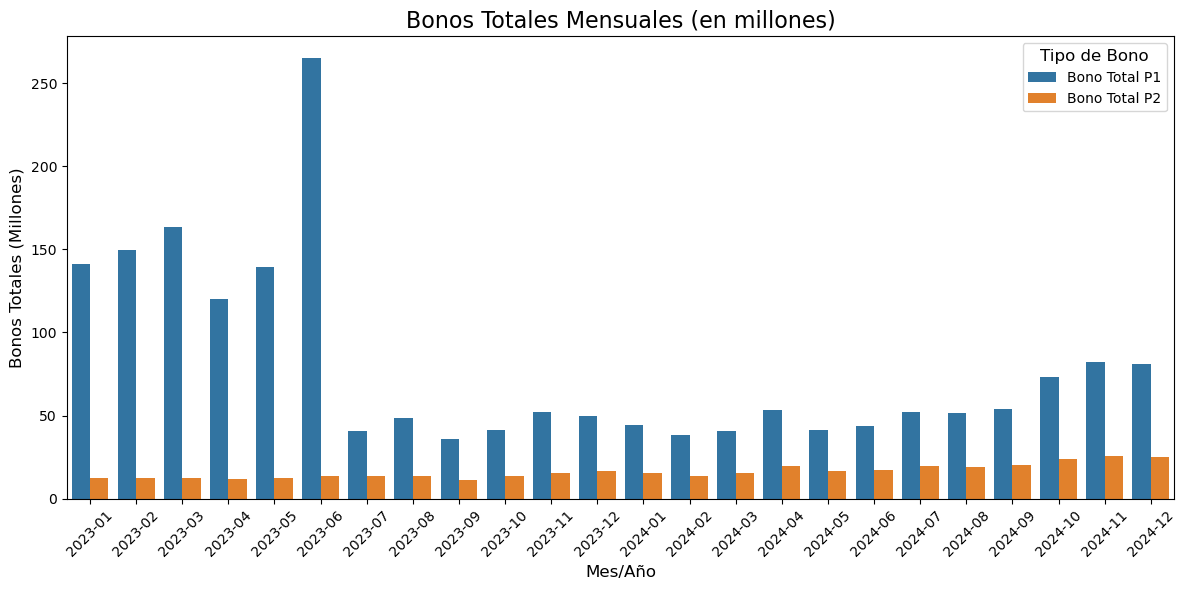

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar la hoja "Bonos Totales Mensuales"
file_path = "Final.xlsx"  # Cambia este nombre si es necesario
bonos_totales_mensuales = pd.read_excel(file_path, sheet_name='Bonos Totales Mensuales')

# Convertir los valores a millones
bonos_totales_mensuales[['Bono Total P1', 'Bono Total P2']] /= 1_000_000

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=bonos_totales_mensuales.melt(id_vars='Mes/Año', value_vars=['Bono Total P1', 'Bono Total P2']),
    x='Mes/Año',
    y='value',
    hue='variable',
    palette=['#1f77b4', '#ff7f0e']  # Azul y Naranja
)
plt.title("Bonos Totales Mensuales (en millones)", fontsize=16)
plt.xlabel("Mes/Año", fontsize=12)
plt.ylabel("Bonos Totales (Millones)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Tipo de Bono", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()


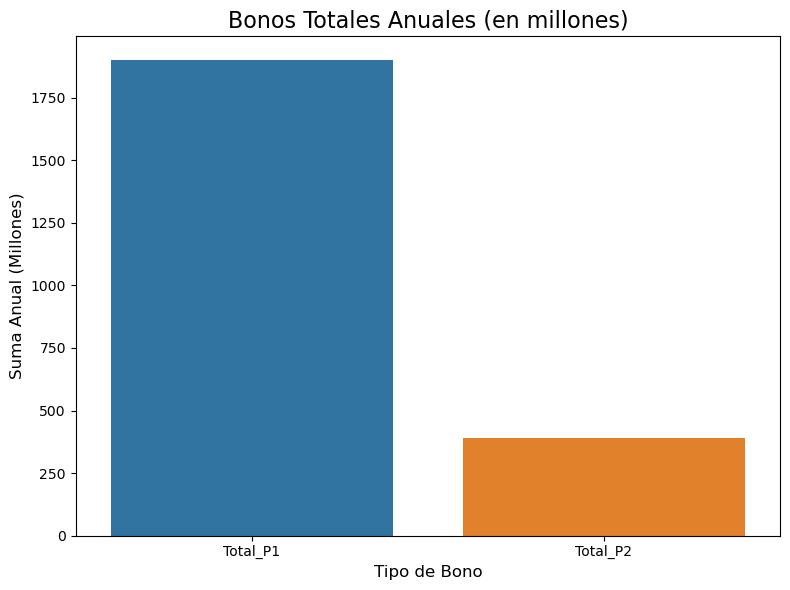

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulación de la tabla en un DataFrame
# Si estás cargando desde Excel, usa esta línea:
# bonos_totales_anuales = pd.read_excel(file_path, sheet_name='Bonos Totales Anuales')

# Convertir los valores a millones
bonos_totales_anuales['Suma Anual'] /= 1_000_000

# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.barplot(
    data=bonos_totales_anuales,
    x='Periodo',
    y='Suma Anual',
    palette=['#1f77b4', '#ff7f0e']  # Azul y Naranja
)
plt.title("Bonos Totales Anuales (en millones)", fontsize=16)
plt.xlabel("Tipo de Bono", fontsize=12)
plt.ylabel("Suma Anual (Millones)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()
